In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Train a logistic regression for the AND and XOR problems using Tensorflow

####  AND

In [24]:
#DATA AND
X=np.asarray([[0,0],[0,1],[1,0],[1,1]])
Y=np.asarray([[0],[0],[0],[1]])

In [25]:
input_size=2
output_layer_size=1
#Los placeholders son para los datos de entrada
x = tf.placeholder(tf.float32, [None, input_size])
y_ = tf.placeholder(tf.float32, [None, output_layer_size]) #la y real

#La variables para lo que se va a ir calculando y modificando en el camino
W_layer1=tf.Variable(tf.random_uniform([input_size,output_layer_size], -1, 1), name="W_layer1")
b_layer1 = tf.Variable(tf.zeros([output_layer_size]), name="b_layer1")

In [26]:
y = tf.nn.sigmoid(tf.matmul(x,W_layer1)+b_layer1) #la de nuestra
lossfn = tf.reduce_mean(tf.reduce_sum((y_-y)**2)) #cuadratico

learning_rate = 0.01
epochs = 5000
train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(lossfn)



In [27]:
init = tf.global_variables_initializer()
sess = tf.Session()

In [30]:
sess.run(init)
for i in range(epochs):
  sess.run(train_step, feed_dict={x: X, y_: Y})

In [31]:
#imprimir alguna variable
print(sess.run(y, feed_dict={x:[[0.8,0.5]]}))
print ("W layer:")
print(sess.run(W_layer1, feed_dict={x: X, y_: Y}))

[[ 0.3443895]]
W layer:
[[ 2.58579254]
 [ 2.58601594]]


In [32]:

correct_prediction = tf.equal(tf.round(y),y_) # aca estams definiendo otras operacioes
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: X, y_: Y})) # las corremos

1.0



barrera de decision

In [33]:
w=[sess.run(b_layer1, feed_dict={x: X, y_: Y})[0]]+[i[0] for i in sess.run(W_layer1, feed_dict={x: X, y_: Y})]
print (w)

[-4.0054355, 2.5857925, 2.5860159]


In [34]:
m=((w[0]/w[2]))/((-w[0]/w[1]))


print (-w[0]/w[1])
print (-w[0]/w[2], m)

1.54902
1.54888 -0.999914


(-5.2, 5.2)

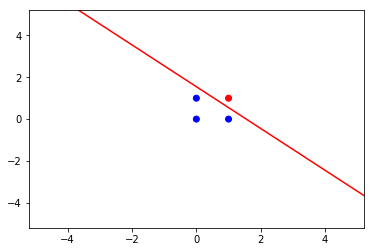

In [35]:
plt.scatter(X[:,0],X[:,1],c=['red' if i==1 else 'blue' for i in Y])
x2 = np.linspace(-5.2,5.2,100) # 100 numeros espaciados
plt.plot(x2,-w[0]/w[2]+m*x2,color='red')
plt.ylim([-5.2,5.2])
plt.xlim([-5.2,5.2])

####  XOR

In [36]:
#DATA XOR
Xxor=np.asarray([[0,0],[0,1],[1,0],[1,1]])
Yxor=np.asarray([[0],[1],[1],[0]])

In [37]:
input_size=2
output_layer_size=1
#Los placeholders son para los datos de entrada
x = tf.placeholder(tf.float32, [None, input_size])
y_ = tf.placeholder(tf.float32, [None, output_layer_size]) #la y real

#La variables para lo que se va a ir calculando y modificando en el camino
W_layer1=tf.Variable(tf.random_uniform([input_size,output_layer_size], -1, 1), name="W_layer1")
b_layer1 = tf.Variable(tf.zeros([output_layer_size]), name="b_layer1")

In [38]:
y = tf.nn.sigmoid(tf.matmul(x,W_layer1)+b_layer1) #la de nuestra
lossfn = tf.reduce_mean(tf.reduce_sum((y_-y)**2)) #cuadratico

learning_rate = 0.01
epochs = 5000
train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(lossfn)



In [39]:
init = tf.global_variables_initializer()
sess = tf.Session()

sess.run(init)
for i in range(epochs):
  sess.run(train_step, feed_dict={x: Xxor, y_: Yxor})


#imprimir alguna variable
print(sess.run(y, feed_dict={x:[[0.8,0.5]]}))
print ("W layer:")
print(sess.run(W_layer1, feed_dict={x: Xxor, y_: Yxor}))


correct_prediction = tf.equal(tf.round(y),y_) # aca estams definiendo otras operacioes
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: Xxor, y_: Yxor})) # las corremos

[[ 0.50025666]]
W layer:
[[ 0.00735756]
 [ 0.00544144]]
0.25


Barrera de decision

In [40]:
w=[sess.run(b_layer1, feed_dict={x: Xxor, y_: Yxor})[0]]+[i[0] for i in sess.run(W_layer1, feed_dict={x: Xxor, y_: Yxor})]
print (w)
ycorte=(w[0]/w[2])
xcorte=(-w[0]/w[1])
m=ycorte/xcorte


print (xcorte,ycorte,m)



[-0.0075800386, 0.0073575554, 0.005441444]
1.03024 -1.39302 -1.35213


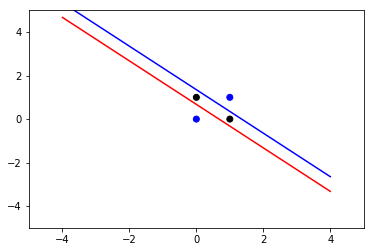

In [48]:

recta = np.linspace(-4,4,10)
plt.plot(-recta,recta - m,c='blue')
plt.plot(-recta,recta -m/2,c='red')
plt.scatter(Xxor[:,0],Xxor[:,1],color=['black' if i==1 else 'blue' for i in Yxor])
plt.ylim([-5,5])
plt.xlim([-5,5])
plt.show()

